# 0. Description

* WO - without types (ignoring method) 
* IE - inner encoded types (diversified training method)

In [1]:
import json
from collections import defaultdict
from itertools import product
from pathlib import Path
from IPython.display import Image

import numpy as np
import matplotlib.pyplot as plt


path_to_models = Path('../../etc/models/docunet')

# 1. WO dev results

In [2]:
wo_eval_f1 = []
for model_dir in path_to_models.glob('wo_*'):
    with (model_dir / 'eval_results.json').open('r') as file:
        res = json.load(file)
        wo_eval_f1.append(res['f1'])
        
print(np.mean(wo_eval_f1))
print(np.std(wo_eval_f1))

0.6057391885543798
0.0015874450700197403


# 2. WO test results

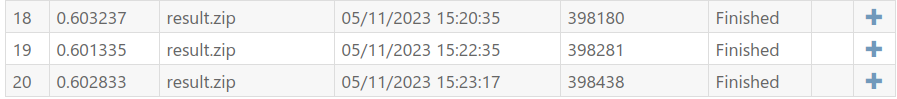

In [3]:
# Get results from there
Image("img/docunet_wo_test_results.png")

In [4]:
wo_test_f1 = [0.603237, 0.601335, 0.602833]

print(np.mean(wo_test_f1))
print(np.std(wo_test_f1))

0.6024683333333333
0.0008181838967426117


# 3. IE dev results

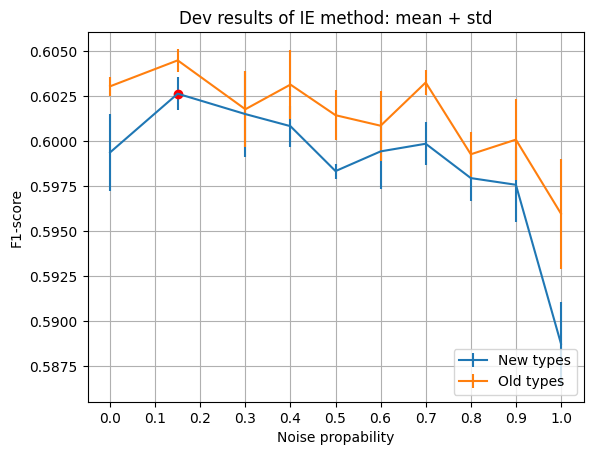

In [5]:
noise_prob = [0.0, 0.15, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
seeds = ['42', '119', '231']

dev_results_new_tmp = defaultdict(list)
dev_results_old_tmp = defaultdict(list)

for noise_p, s in product(noise_prob, seeds):
    file_name = 'ie_{}_{}'.format(str(noise_p).replace('.', ''), s)
    file = path_to_models / file_name / "eval_results.json"
    
    with file.open('r') as f:
        res = json.load(f)
        dev_results_new_tmp[noise_p].append(res['f1'])
        
    file = path_to_models / file_name / "eval_results_old.json"
    
    with file.open('r') as f:
        res = json.load(f)
        dev_results_old_tmp[noise_p].append(res['f1'])
        
dev_results_new = defaultdict(dict)
for key, value in dev_results_new_tmp.items():
    dev_results_new[key]['mean'] = np.mean(value)
    dev_results_new[key]['std'] = np.std(value)
    
dev_results_old = defaultdict(dict)
for key, value in dev_results_old_tmp.items():
    dev_results_old[key]['mean'] = np.mean(value)
    dev_results_old[key]['std'] = np.std(value)

n_mean = [dev_results_new[key]['mean'] for key in noise_prob]
n_std = [dev_results_new[key]['std'] for key in noise_prob]

n_mean_old = [dev_results_old[key]['mean'] for key in noise_prob]
n_std_old = [dev_results_old[key]['std'] for key in noise_prob]

n_mean_max = np.max(n_mean)
n_mean_max_arg = np.argmax(n_mean)

plt.errorbar(noise_prob, n_mean, n_std, label='New types')
plt.errorbar(noise_prob, n_mean_old, n_std_old, label='Old types')
plt.plot(noise_prob[n_mean_max_arg], n_mean_max, 'ro')

plt.ylabel('F1-score')
plt.xlabel('Noise propability')
plt.title('Dev results of IE method: mean + std')
plt.xticks(np.arange(0, 1.1, step=0.1)) 
plt.grid()
plt.legend(loc=4)
plt.show()

# 4. IE test results

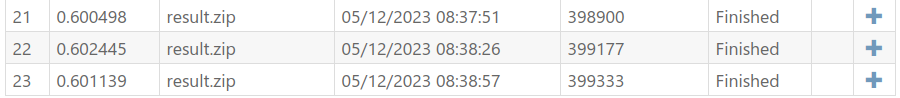

In [6]:
# Get results from there
Image("img/docunet_ie_test_results.png")

In [7]:
test_f1 = [0.600498, 0.602445, 0.601139]

print(np.mean(test_f1))
print(np.std(test_f1))

0.6013606666666665
0.0008101663752313955
